In [1]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
import numpy as np

X, y = fetch_openml('monks-problems-1', return_X_y=True)
y = y.astype(np.float32)

Xtrain = OneHotEncoder(sparse=False).fit_transform(X[:124,:])
Xtest = OneHotEncoder(sparse=False).fit_transform(X[124:,:])
ytrain, ytest = y[:124], y[124:]

In [5]:
import numpy as np

from neuralnet.network import Network
from neuralnet.layers import LayerDense,ActivationLayer
from neuralnet.activations import tanh, sigmoid
from neuralnet.losses import mse, mse_prime

# network
net = Network()
net.add(LayerDense(17, 5))
net.add(ActivationLayer(sigmoid))
net.add(LayerDense(5, 1))
net.add(ActivationLayer(tanh))
# train
net.use(mse, mse_prime)
net.fit(Xtrain, ytrain, epochs=600, learning_rate=0.01)

# test
out = net.predict(Xtrain)

epoch 1/600   error=0.374740    accuracy=0.532258
epoch 2/600   error=0.237757    accuracy=0.532258
epoch 3/600   error=0.233571    accuracy=0.548387
epoch 4/600   error=0.228787    accuracy=0.564516
epoch 5/600   error=0.224271    accuracy=0.564516
epoch 6/600   error=0.220001    accuracy=0.588710
epoch 7/600   error=0.215943    accuracy=0.620968
epoch 8/600   error=0.212076    accuracy=0.612903
epoch 9/600   error=0.208390    accuracy=0.629032
epoch 10/600   error=0.204883    accuracy=0.629032
epoch 11/600   error=0.201556    accuracy=0.620968
epoch 12/600   error=0.198409    accuracy=0.629032
epoch 13/600   error=0.195444    accuracy=0.645161
epoch 14/600   error=0.192659    accuracy=0.669355
epoch 15/600   error=0.190050    accuracy=0.661290
epoch 16/600   error=0.187611    accuracy=0.677419
epoch 17/600   error=0.185334    accuracy=0.693548
epoch 18/600   error=0.183209    accuracy=0.701613
epoch 19/600   error=0.181227    accuracy=0.725806
epoch 20/600   error=0.179376    accurac

epoch 175/600   error=0.068412    accuracy=0.927419
epoch 176/600   error=0.068028    accuracy=0.927419
epoch 177/600   error=0.067652    accuracy=0.927419
epoch 178/600   error=0.067284    accuracy=0.927419
epoch 179/600   error=0.066923    accuracy=0.927419
epoch 180/600   error=0.066570    accuracy=0.927419
epoch 181/600   error=0.066225    accuracy=0.927419
epoch 182/600   error=0.065886    accuracy=0.927419
epoch 183/600   error=0.065555    accuracy=0.927419
epoch 184/600   error=0.065230    accuracy=0.927419
epoch 185/600   error=0.064912    accuracy=0.935484
epoch 186/600   error=0.064601    accuracy=0.935484
epoch 187/600   error=0.064296    accuracy=0.935484
epoch 188/600   error=0.063997    accuracy=0.935484
epoch 189/600   error=0.063704    accuracy=0.935484
epoch 190/600   error=0.063417    accuracy=0.935484
epoch 191/600   error=0.063137    accuracy=0.935484
epoch 192/600   error=0.062861    accuracy=0.935484
epoch 193/600   error=0.062591    accuracy=0.935484
epoch 194/60

epoch 347/600   error=0.034947    accuracy=0.975806
epoch 348/600   error=0.034657    accuracy=0.975806
epoch 349/600   error=0.034364    accuracy=0.975806
epoch 350/600   error=0.034068    accuracy=0.975806
epoch 351/600   error=0.033770    accuracy=0.975806
epoch 352/600   error=0.033469    accuracy=0.975806
epoch 353/600   error=0.033166    accuracy=0.975806
epoch 354/600   error=0.032861    accuracy=0.975806
epoch 355/600   error=0.032553    accuracy=0.975806
epoch 356/600   error=0.032243    accuracy=0.975806
epoch 357/600   error=0.031931    accuracy=0.975806
epoch 358/600   error=0.031617    accuracy=0.975806
epoch 359/600   error=0.031301    accuracy=0.975806
epoch 360/600   error=0.030983    accuracy=0.975806
epoch 361/600   error=0.030663    accuracy=0.975806
epoch 362/600   error=0.030341    accuracy=0.975806
epoch 363/600   error=0.030018    accuracy=0.975806
epoch 364/600   error=0.029693    accuracy=0.975806
epoch 365/600   error=0.029366    accuracy=0.975806
epoch 366/60

epoch 520/600   error=0.003757    accuracy=1.000000
epoch 521/600   error=0.003724    accuracy=1.000000
epoch 522/600   error=0.003692    accuracy=1.000000
epoch 523/600   error=0.003660    accuracy=1.000000
epoch 524/600   error=0.003629    accuracy=1.000000
epoch 525/600   error=0.003598    accuracy=1.000000
epoch 526/600   error=0.003567    accuracy=1.000000
epoch 527/600   error=0.003537    accuracy=1.000000
epoch 528/600   error=0.003508    accuracy=1.000000
epoch 529/600   error=0.003478    accuracy=1.000000
epoch 530/600   error=0.003450    accuracy=1.000000
epoch 531/600   error=0.003421    accuracy=1.000000
epoch 532/600   error=0.003393    accuracy=1.000000
epoch 533/600   error=0.003366    accuracy=1.000000
epoch 534/600   error=0.003338    accuracy=1.000000
epoch 535/600   error=0.003312    accuracy=1.000000
epoch 536/600   error=0.003285    accuracy=1.000000
epoch 537/600   error=0.003259    accuracy=1.000000
epoch 538/600   error=0.003233    accuracy=1.000000
epoch 539/60

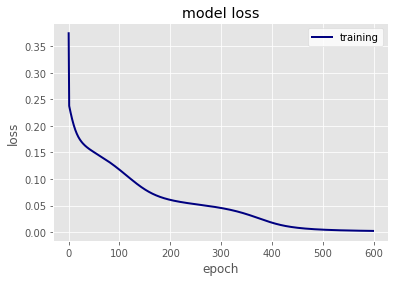

In [6]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig, loss = plt.subplots()
loss.plot(net.train_loss_history, color='navy', lw=2)
loss.set_title('model loss')
loss.set_xlabel('epoch')
loss.set_ylabel('loss')
loss.legend(['training', 'validation']).get_frame().set_facecolor('white')
plt.show()

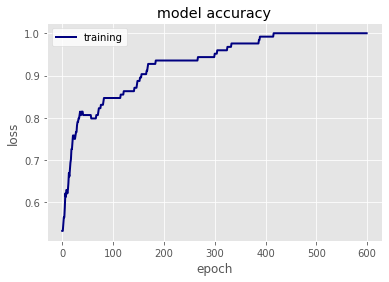

In [7]:
plt.style.use('ggplot')

fig, loss = plt.subplots()
loss.plot(net.val_accuracy_history, color='navy', lw=2)
loss.set_title('model accuracy')
loss.set_xlabel('epoch')
loss.set_ylabel('loss')
loss.legend(['training', 'validation']).get_frame().set_facecolor('white')
plt.show()